<a href="https://colab.research.google.com/github/kasev/mops/blob/master/scripts/exploring-matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pickle
import urllib
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [6]:

from google.colab import files
# defining function for saving+downloading the latest figure

def download_figure(fig=None, filename=None):
  if (filename==None) | (".png" not in str(filename)):
    filename = "figure.png"
  if fig==None:
    plt.savefig(filename)
  else:
    fig.savefig(filename)
  files.download(filename)

In [2]:
# load vocabularies
try:
    bidecades_vocabs_counts_df = pickle.load(open("../data/bidecades_vocabs_counts_df.pickle", "rb"))
except:
    bidecades_vocabs_counts_df = pickle.load(urllib.request.urlopen("https://github.com/kasev/mops/raw/master/data/bidecades_vocabs_counts_df.pickle"))

In [4]:
# locally
try:
    cooc_dict = pickle.load(open("../data/cooc_dict.pickle", "rb"))
except:
    urllib.request.urlretrieve("https://github.com/kasev/mops/raw/master/data/cooc_dict.pickle", "temp.pickle")
    with open("temp.pickle", "rb") as f:
        cooc_dict = pickle.load(f)

In [5]:
# transform the matrcices into dataframes (much more memory consuming...)
for bidecade, cooc in cooc_dict.items():
    try:
        cooc_df = pd.DataFrame(cooc.todense())
        cooc_norm_df = cooc_df / cooc_df.max()
        cooc_norm_df.columns = bidecades_vocabs_counts_df.index
        cooc_norm_df.index = bidecades_vocabs_counts_df.index
        cooc_dict[bidecade] = cooc_norm_df
    except:
        pass

In [6]:
cooc_dict["1900-1919"]["Paul"].sort_values(ascending=False).head(20)

Paul          1.000000
epistle       0.055488
Apostle       0.035643
letter        0.028799
apostle       0.028537
Jesus         0.012408
saint         0.011310
write         0.010595
use           0.009164
say           0.008548
life          0.008089
Peter         0.008084
doctrine      0.007852
conception    0.007025
view          0.006483
act           0.006210
thought       0.006088
make          0.005838
speak         0.005711
preach        0.005615
Name: Paul, dtype: float64

In [7]:
cooc_dict["1980-1999"]["Paul"].sort_values(ascending=False).head(20)

Paul          1.000000
letter        0.052684
Apostle       0.025385
use           0.021093
epistle       0.016693
apostle       0.014810
say           0.012032
write         0.010240
theology      0.009905
John          0.009842
see           0.008296
view          0.007742
argument      0.007689
thought       0.007393
speak         0.007334
understand    0.006118
make          0.006090
Siebeck       0.005324
Jesus         0.005295
argue         0.004876
Name: Paul, dtype: float64

In [8]:
def return_tfidf_position(key1, key2, bidecade):
    position = cooc_dict[bidecade][key1].sort_values(ascending=False).index.get_loc(key2)
    return position

In [9]:
# define bidecades:
bidecades_list = ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999',
 '2000-2019']

In [10]:
return_tfidf_position("Paul", "apostle", "1940-1959")

7

In [11]:
# development...
key1 = "Paul"
key2 = "apostle"
positions = []
for bidecade in bidecades_list:
    positions.append(return_tfidf_position(key1, key2, bidecade))

In [12]:
def position_by_bidecade(key1, key2):
    positions = []
    for bidecade in bidecades_list:
        positions.append(return_tfidf_position(key1, key2, bidecade))
    return positions

# Explorations...

In [13]:
position_by_bidecade("Paul", "judaism")

[843, 3399, 561, 1353, 1925, 698]

In [14]:
position_by_bidecade("Paul", "apostle")


[4, 5, 7, 5, 5, 5]

In [15]:
position_by_bidecade("Paul", "Apostle")

[2, 1, 1, 2, 2, 1]

In [22]:

def plot_postion_by_bidecade(tuples, figsize=(6,4)):
  fig, ax = plt.subplots(tight_layout=True, figsize=figsize, dpi=150)
  #fig.patch.set_facecolor("black")
  #ax.set_facecolor("black")
  colors = sns.color_palette(None, len(tuples))
  for terms, color in zip(tuples, colors):
    positions = position_by_bidecade(terms[0], terms[1])
    ax.plot(positions, linewidth=2, color=color, label=terms[0]+"~"+terms[1])
  ax.set_title(", ".join([terms[0]+"~"+terms[1] for terms in tuples]), color="white")
  ax.set_xticks(range(6))
  #ax.set_xticklabels(bidecades_list, color="black", rotation=90)
  ax.set_xticklabels(bidecades_list, rotation=90)
  if np.max(positions) < 5:
    ax.set_yticklabels([str(np.round(el, 1)) for el in ax.get_yticks()], color="black")
  else:
    ax.set_yticklabels([str(int(el)) for el in ax.get_yticks()], color="black")
  ax.invert_yaxis()
  ax.set_xlabel("bidecade", color="black")
  ax.set_ylabel("rank", color="black")
  # ax.spines['bottom'].set_color('white')
  #ax.spines['top'].set_color('white') 
  #ax.spines['right'].set_color('white')
  #ax.spines['left'].set_color('white')
  ax.legend() # facecolor="black", labelcolor="white")
  return fig

/var/folders/57/tg7c_g894t5c2z3swkqzds5h0000gn/T/ipykernel_7607/223742153.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(int(el)) for el in ax.get_yticks()], color="black")


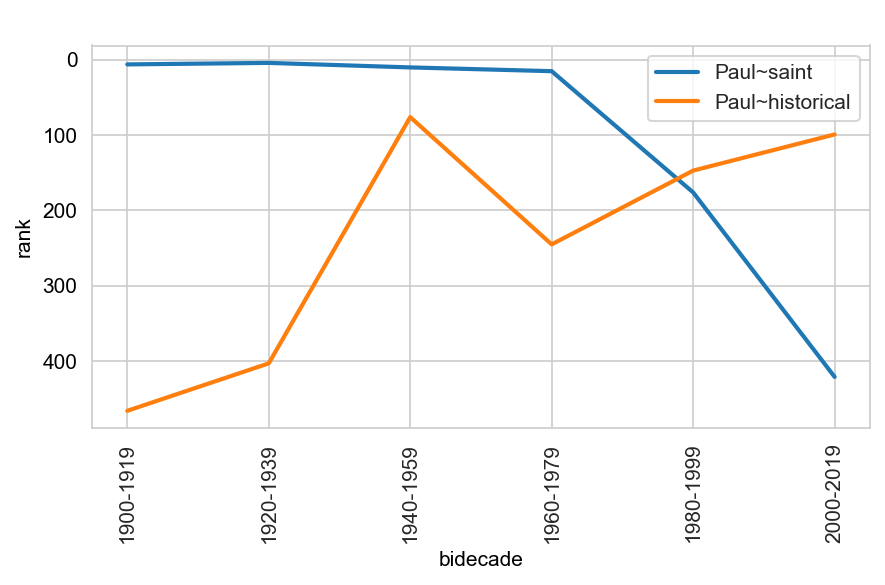

In [23]:
fig = plot_postion_by_bidecade([("Paul", "saint"), ("Paul", "historical")], figsize=(6,4))

In [24]:
fig.savefig("../figures/paul-saint_vs_historical.png")

In [25]:

# download_figure(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Explorations of half-decades from the last 30 years...

I divided the last 30 years into these six halfdecades:
halfdecades_strs = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']
These



In [34]:
# locally
try:
    cooc_dict_2000 = pickle.load(open("../data/cooc_dict_2000.pickle", "rb"))
except:
    urllib.request.urlretrieve("https://github.com/kasev/mops/raw/master/data/cooc_dict_2000.pickle", "temp.pickle")
    with open("temp.pickle", "rb") as f:
        cooc_dict_2000 = pickle.load(f)

In [35]:
cooc_dict_2000.keys()

dict_keys(['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'])

In [44]:
halfdecades_strs = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']

In [36]:
# transform the matrcices into dataframes (much more memory consuming...)
for halfdecade, cooc in cooc_dict_2000.items():
    try:
        cooc_df = pd.DataFrame(cooc.todense())
        cooc_norm_df = cooc_df / cooc_df.max()
        cooc_norm_df.columns = bidecades_vocabs_counts_df.index
        cooc_norm_df.index = bidecades_vocabs_counts_df.index
        cooc_dict_2000[halfdecade] = cooc_norm_df
    except:
        pass

In [37]:
cooc_dict_2000[halfdecades_strs[0]]

,man,new,Jesus,et,God,Paul,make,church,life,see,...,angle,substantive,noteworthy,Kevin,locus,Ian,gesture,metaphorical,layer,less
man,1.000000,0.004537,0.002785,0.000000,0.005426,0.000781,0.010146,0.000551,0.002848,0.002834,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.003748
new,0.005763,1.000000,0.000630,0.000000,0.001933,0.000395,0.003201,0.006738,0.019811,0.001480,...,0.063196,0.0,0.0,0.0,0.007328,0.0,0.0,0.004082,0.003428,0.000000
Jesus,0.004639,0.000826,1.000000,0.000318,0.006830,0.006371,0.004361,0.001530,0.014420,0.005011,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
et,0.000000,0.000000,0.000140,1.000000,0.000000,0.001512,0.000000,0.000000,0.000000,0.000141,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
God,0.016099,0.004516,0.012164,0.000000,1.000000,0.003436,0.024296,0.005424,0.011544,0.013914,...,0.000000,0.0,0.0,0.0,0.009951,0.0,0.0,0.000000,0.000000,0.008474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000123,...,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000
gesture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000267,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000
metaphorical,0.000000,0.000104,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000
layer,0.000000,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000


In [39]:
def return_tfidf_position_halfdecade(key1, key2, halfdecade):
    position = cooc_dict_2000[halfdecade][key1].sort_values(ascending=False).index.get_loc(key2)
    return position

In [40]:
def position_by_halfdecade(key1, key2):
    positions = []
    for halfdecade in halfdecades_strs:
        positions.append(return_tfidf_position_halfdecade(key1, key2, halfdecade))
    return positions

In [45]:
def plot_postion_by_halfdecade(tuples, figsize=(6,4)):
    fig, ax = plt.subplots(tight_layout=True, figsize=figsize, dpi=150)
    fig.patch.set_facecolor("black")
    ax.set_facecolor("black")
    colors = sns.color_palette(None, len(tuples))
    for terms, color in zip(tuples, colors):
        positions = position_by_halfdecade(terms[0], terms[1])
        ax.plot(positions, linewidth=2, color=color, label=terms[0]+"~"+terms[1])
    ax.set_title(", ".join([terms[0]+"~"+terms[1] for terms in tuples]), color="white")
    ax.set_xticks(range(6))
    ax.set_xticklabels(halfdecades_strs, color="white", rotation=90)
    #if np.max(positions) < 5:
    #  ax.set_yticklabels([str(np.round(el, 1)) for el in ax.get_yticks()], color="white")
    #else:
    ax.set_yticklabels([str(int(el)) for el in ax.get_yticks()], color="white")
    #ax.invert_yaxis()
    ax.set_xlabel("halfdecade", color="white")
    ax.set_ylabel("rank", color="white")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.legend(facecolor="black", labelcolor="white")
    return fig

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_33415/3287329326.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(el)) for el in ax.get_yticks()], color="white")


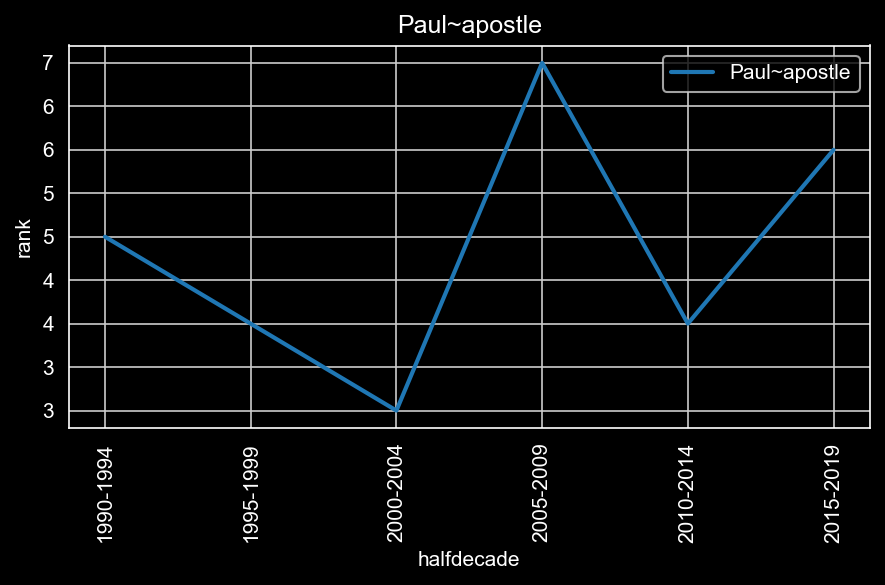

In [46]:
fig = plot_postion_by_halfdecade([("Paul", "apostle")])